<a href="https://colab.research.google.com/github/roboprogrammer13/ZacatkyPythonu/blob/main/Fraktaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ColabTurtle
from ColabTurtle.Turtle import *

### Hilbertova křivka
1. Nekonečná cesta v konečném prostoru
Hilbertova křivka je paradox - pokud bys ji kreslil donekonečna, měla by nekonečnou délku, ale přitom by se vešla do obyčejného čtverce! Představ si, že máš nekonečně dlouhou šňůru sbalenu v malé krabičce.
2. Matematický GPS systém
Hilbertova křivka se skutečně používá v počítačových hrách a mapových aplikacích! Pomáhá organizovat data tak, že věci co jsou blízko u sebe v reálném světě, jsou blízko i v paměti počítače. Díky tomu hra načítá prostředí rychleji.

level – řád Hilbertovy křivky (obvyklé 1–6)
step – délka jednoho segmentu

[Hilbertova křivka](https://en.wikipedia.org/wiki/Hilbert_curve)
hilbert(level, angle, step)

Hilbertova křivka řádu n se skládá ze 4 menších Hilbertových křivek řádu n–1.

H0 - empty(return)

H1 - right, H0, forward, left, H0, forward, H0, left, forward, H0, right (red)

H2 - right, H1, forward, left, H1, forward, H1, left, forward, H1, right (blue)

H3 - right, H2, forward, left, H2, forward, H2, left, forward, H2, right (black)

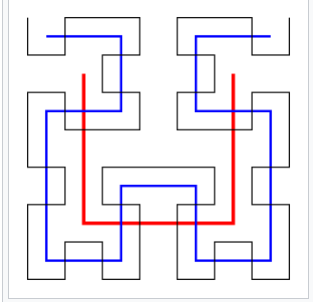

In [ ]:
def hilbert(level, angle, step):
    if level == 0:
        return

    # right, H, forward
    right(angle)
    hilbert(level-1, -angle, step)
    forward(step)

    #  left, H, forward,
    left(angle)
    hilbert(level-1, angle, step)
    forward(step)

    #H0, left, forward, H, right
    hilbert(level-1, angle, step)
    left(angle)
    forward(step)
    hilbert(level-1, -angle, step)
    right(angle)


In [ ]:
initializeTurtle(initial_speed=10,initial_window_size=(320,320))
penup()
goto(10,window_width()-10)       # počáteční pozice vlevo dole, + okraj
pendown()
hilbert(level=4, angle = 90, step=20) # level = 4,5, step = 20,10

In [ ]:
initializeTurtle(initial_speed=10,initial_window_size=(320,320))
bgcolor('darkviolet')
penup()
goto(10,window_width()-10)       # počáteční pozice vlevo dole, + okraj
pendown()
color('lime') # "lime","navy","teal", "gold","tomato", "lightgreen", "deepskyblue"
hilbert(level=5, angle=90, step=10) # level = 4,5, step = 20,10

### Kochova vločka

Každé "krok dopředu" je zase celá Kochova křivka (o stupeň menší)! Takže střecha má střechu, která má střechu... až do stupně 0, kdy jen nakreslíš čáru.

F = forward (krok), + = left 60° (doleva), - = right 60° (doprava)

F -> F + F -- F + F

K0 - úsečka, tj F
K1 - K0 left K0 right right K0 left K0
K2 - K1 left K1 right right K1 left K1

[wikipedia](https://cs.wikipedia.org/wiki/Kochova_k%C5%99ivka)

In [ ]:
initializeTurtle(initial_speed=13,initial_window_size=(450,600))
speed(10)

def koch(délka, stupeň): # délka strany prvního trojúhelníka
    if stupeň == 0:
        forward(délka)
    else:
        koch(délka/3, stupeň-1)
        left(60)
        koch(délka/3, stupeň-1)
        right(120)
        koch(délka/3, stupeň-1)
        left(60)
        koch(délka/3, stupeň-1)

# nakreslí celou vločku
def vločka(délka, stupeň):
    for _ in range(3):
        koch(délka, stupeň)
        right(120)

penup()
goto(100, 500)  # posun na vhodné místo
pendown()

vločka(300, 3)   # délka, stupeň (detail, 0 trojuhelnik, 1 zoubek)


Fraktální strom (binary tree)

In [ ]:
def tree(length, level):
    if level == 0:
        forward(length)
        backward(length)
        return

    forward(length)

    left(30)
    tree(length*0.7, level-1)
    right(60)
    tree(length*0.7, level-1)
    left(30)

    backward(length)

# --- spouštěcí část ---
initializeTurtle()
speed(10)
tree(60, 5)


Sierpinského koberec

In [ ]:
from ColabTurtle.Turtle import *

def square(a):
    for _ in range(4):
        forward(a); left(90)

def carpet(a, level):
    if level == 0:
        square(a)
        return

    # 3×3 mřížka
    for i in range(3):
        for j in range(3):
            if i == 1 and j == 1:
                # střed se vynechá (díra)
                pass
            else:
                penup(); forward(j * a/3); left(90); forward(i * a/3); right(90)
                pendown()
                carpet(a/3, level-1)
                penup(); right(90); forward(i * a/3); left(90); backward(j * a/3)

# start
initializeTurtle()
speed(10)
carpet(180, 3)
